## Importing required libraries

In [1]:
import numpy as np              
import pandas as pd             
import matplotlib.pyplot as plt
import seaborn as sns          
%matplotlib inline

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

import warnings                 
warnings.filterwarnings('ignore')

## Loading the Data and perform EDA

In [2]:
df_pre=pd.read_csv(r"C:\Users\DELL\Desktop\MSC DATA SCIENCE\SEM-II\SET_II\New folder\chennai housing\Chennai houseing sale.csv")
df_pre.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


### To replace incorrect spelling of locations with correct spelling

In [3]:
print(list(df_pre.AREA.unique()))
print(len(list(df_pre.AREA.unique())))

['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet', 'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam', 'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar', 'KKNagar']
17


In [4]:
location_dict = {'Adyr': 'Adyar', 'Velchery': 'Velachery', 'Chormpet': 'Chrompet','Chrmpet': 'Chrompet', 'KKNagar': 'KK Nagar', 'TNagar': 'T Nagar', 'Chrompt': 'Chrompet', 'Ann Nagar': 'Anna Nagar', 'Ana Nagar': 'Anna Nagar','Karapakam': 'Karapakkam'}
df_pre['AREA'] = df_pre['AREA'].replace(location_dict)

In [5]:
print(list(df_pre.AREA.unique()))
print(len(list(df_pre.AREA.unique())))

['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet', 'KK Nagar', 'T Nagar']
7


In [6]:
df=df_pre

### Dealing with null values

In [7]:
## Listing the features with null values & null value count
pd.isnull(df_pre).sum()[pd.isnull(df_pre).sum() > 0]

N_BEDROOM      1
N_BATHROOM     5
QS_OVERALL    48
dtype: int64

In [8]:
## We deal with null values by interpolating
df =df.interpolate()
## check for any null values, after modifying
pd.isnull(df).sum()[pd.isnull(df).sum() > 0]

Series([], dtype: int64)

### Dealing with errors & mistakes in segment names in categorical features

In [9]:
## Checking the modifications done to names in each feature variable
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


PRT_ID
['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']

DATE_SALE
['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']

SALE_COND
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']

PARK_FACIL
['Yes' 'No' 'Noo']

DATE_BUILD
['15-05-1967' '22-12-1995' '09-02-1992' ... '01-09-1978' '11-08-1977'
 '24-07-1961']

BUILDTYPE
['Commercial' 'Others' 'Other' 'House' 'Comercial']

UTILITY_AVAIL
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']

STREET
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']

MZZONE
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [10]:
# Before proceeding to EDA, we check the Stastical Description of th DataFrame one more time
df.describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7109.0,1382.0,457.0,500.0,993.0,1373.0,1744.0,2500.0
DIST_MAINROAD,7109.0,100.0,57.0,0.0,50.0,99.0,148.0,200.0
N_BEDROOM,7109.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0
N_BATHROOM,7109.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0
N_ROOM,7109.0,4.0,1.0,2.0,3.0,4.0,4.0,6.0
QS_ROOMS,7109.0,4.0,1.0,2.0,3.0,4.0,4.0,5.0
QS_BATHROOM,7109.0,4.0,1.0,2.0,3.0,4.0,4.0,5.0
QS_BEDROOM,7109.0,3.0,1.0,2.0,3.0,4.0,4.0,5.0
QS_OVERALL,7109.0,4.0,1.0,2.0,3.0,4.0,4.0,5.0
REG_FEE,7109.0,376938.0,143071.0,71177.0,272406.0,349486.0,451562.0,983922.0


### Perform Visualization to understand data well

In [11]:
## As per the above .info() function output, the two date columns - DATE_SALE & DATE_BUILD are in object format
## We convert them into DateTime dtype
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'], format='%d-%m-%Y')
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'], format='%d-%m-%Y')
df[['DATE_SALE', 'DATE_BUILD']].head(5)

,DATE_SALE,DATE_BUILD
0,2011-05-04,1967-05-15
1,2006-12-19,1995-12-22
2,2012-02-04,1992-02-09
3,2010-03-13,1988-03-18
4,2009-10-05,1979-10-13


In [12]:
df.head(3)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,2011-05-04,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,2012-02-04,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200


In [13]:
## We create a new column to determine the age of property
df['PROP_AGE'] = pd.DatetimeIndex(df['DATE_SALE'] ).year - pd.DatetimeIndex(df['DATE_BUILD']).year
df['PROP_AGE'].head(5)

0    44
1    11
2    20
3    22
4    30
Name: PROP_AGE, dtype: int32

### To understand the Distribution in Key Numerical Features

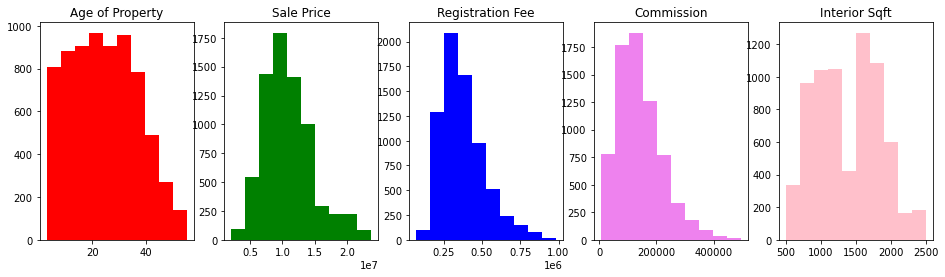

In [14]:
## We create histograms for key numerical features - PROP_AGE, SALES_PRICE, REG_FEE, COMMIS, COMMIS, INT_SQFT
fig, axes = plt.subplots(1, 5, figsize=(16,4))
PROP_AGE = df.PROP_AGE.hist(ax=axes[0], color="red", grid=False).set_title('Age of Property')
SALES_PRICE = df.SALES_PRICE.hist(ax=axes[1], color="green", grid=False).set_title('Sale Price')
REG_FEE = df.REG_FEE.hist(ax=axes[2], color="blue", grid=False).set_title('Registration Fee')
COMMIS = df.COMMIS.hist(ax=axes[3], color="violet", grid=False).set_title('Commission')
INT_SQFT = df.INT_SQFT.hist(ax=axes[4], color="pink", grid=False).set_title('Interior Sqft')
plt.show()

**Some Key Observations**

- Registration fee & Commission features are showing positive skewness
- Interior sqft feature has bimodal distribution

### Property Count by Area: Top Property Areas in Chennai

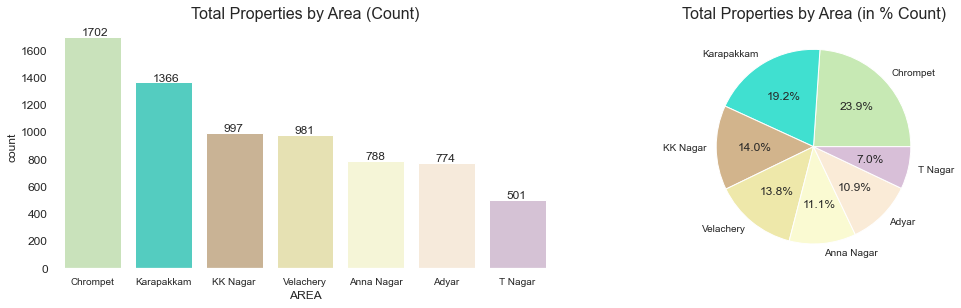

In [15]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':10,'ytick.labelsize':12, 'figure.autolayout':True})
my_col = ('#c7e9b4', '#40E0D0', '#D2B48C', '#EEE8AA','#FAFAD2','#FAEBD7', '#D8BFD8','#F4A460','#F08080')
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.title('Total Properties by Area (Count)', fontdict={'fontsize':16})
ax = sns.countplot(x="AREA", data=df, palette=my_col, order=df['AREA'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+8))

plt.subplot(2,2,2)
plt.title('Total Properties by Area (in % Count)', fontdict={'fontsize':16})
df['AREA'].value_counts().plot(kind='pie', colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')
plt.show()

**Key Observations** 
- Chrompet and Karapakkam have highest number of properties, followed by KK nagar and Velachery
- Of the lot, T Nagar has lowest number of properties

### Property Count by Buildtype, By Area

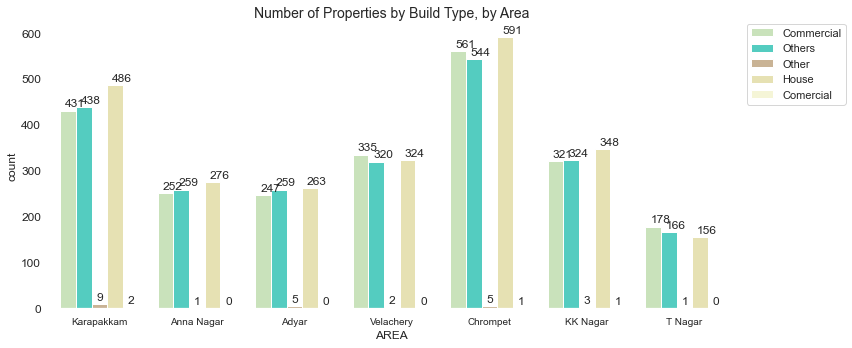

In [16]:
## We make a column chart to visualise property country by build type & by area

plt.figure(figsize=(12,5))
plt.title('Number of Properties by Build Type, by Area', fontdict={'fontsize':14})
ax = sns.countplot(x='AREA', hue='BUILDTYPE', palette=my_col, data=df)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+8))

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

**Some Observations**
- The plot revealts that Chrompet has highest number of properties overall, followed by Karapakkam
- Chrompet, Karapakkam, KK Nagar, & Anna Nagar have higher number of Residential properties
- T Nagar, & Velachery have higher proportion of commercial properties

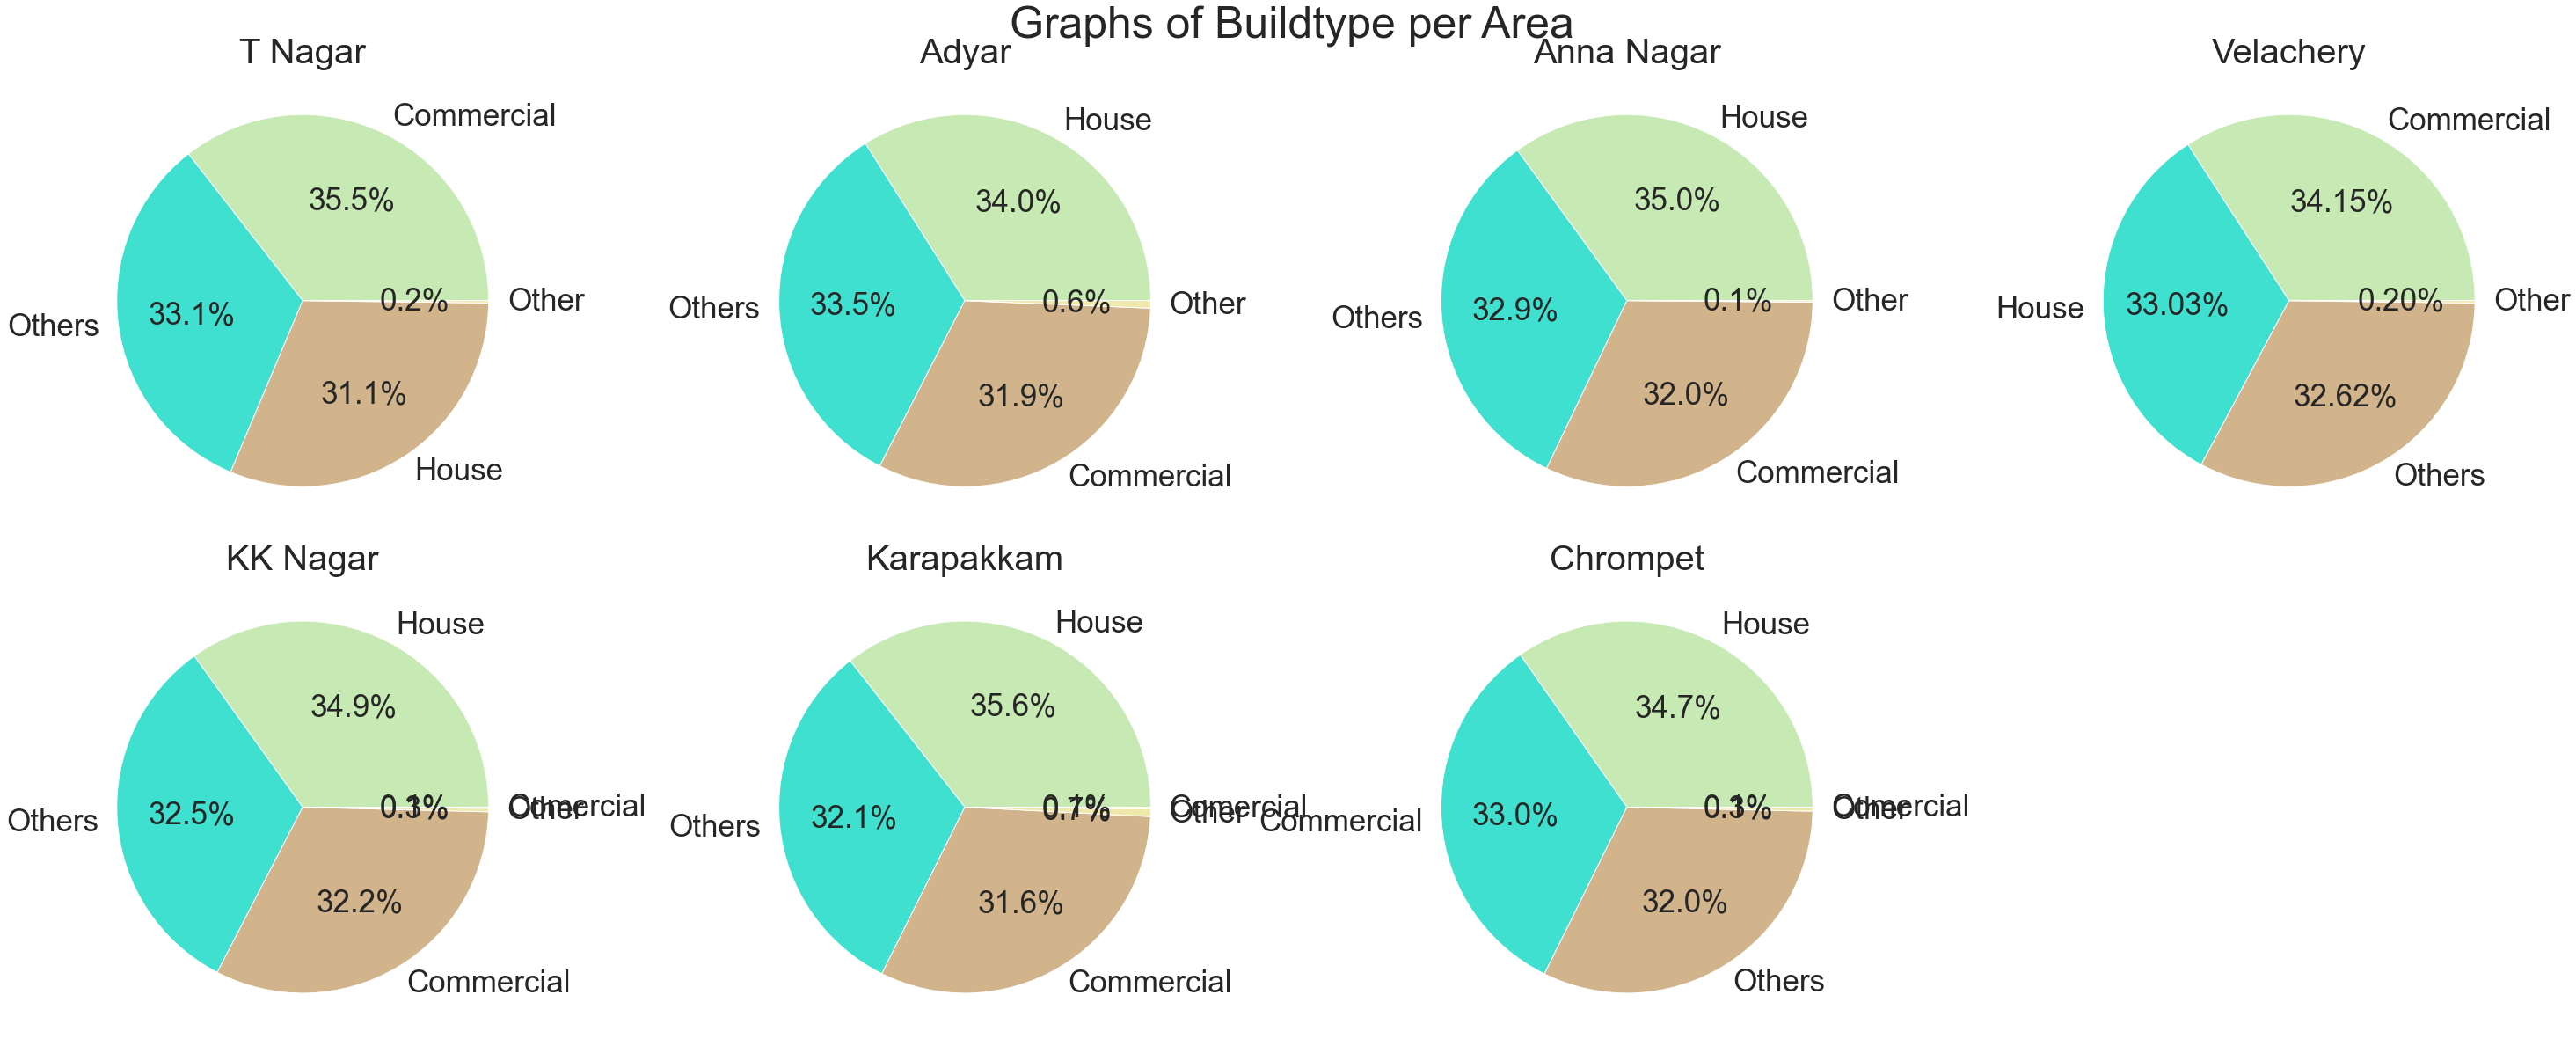

In [17]:
## Now we proceed with pie chart to visualize the property count by buildtype and area

plt.figure(figsize=(40,25))
plt.suptitle('Graphs of Buildtype per Area', fontsize=50)
plt.subplot(3,4,1)
plt.title('T Nagar', fontdict={'fontsize':40})
df['BUILDTYPE'].loc[df['AREA'] == 'T Nagar'].value_counts().plot(kind='pie', colors=my_col, fontsize = 35, legend=None, ylabel='', autopct='%1.1f%%')

plt.subplot(3,4,2)
plt.title('Adyar', fontdict={'fontsize':40})
df['BUILDTYPE'].loc[df['AREA'] == 'Adyar'].value_counts().plot(kind='pie', colors=my_col, fontsize = 35, legend=None, ylabel='', autopct='%1.1f%%')

plt.subplot(3,4,3)
plt.title('Anna Nagar', fontdict={'fontsize':40})
df['BUILDTYPE'].loc[df['AREA'] == 'Anna Nagar'].value_counts().plot(kind='pie', colors=my_col, fontsize = 35, legend=None, ylabel='', autopct='%1.1f%%')

plt.subplot(3,4,4)
plt.title('Velachery', fontdict={'fontsize':40})
df['BUILDTYPE'].loc[df['AREA'] == 'Velachery'].value_counts().plot(kind='pie', colors=my_col, fontsize = 35, legend=None, ylabel='', autopct='%1.2f%%')

plt.subplot(3,4,5)
plt.title('KK Nagar', fontdict={'fontsize':40})
df['BUILDTYPE'].loc[df['AREA'] == 'KK Nagar'].value_counts().plot(kind='pie', colors=my_col, fontsize = 35, legend=None, ylabel='', autopct='%1.1f%%')
plt.subplot(3,4,6)
plt.title('Karapakkam', fontdict={'fontsize':40})
df['BUILDTYPE'].loc[df['AREA'] == 'Karapakkam'].value_counts().plot(kind='pie', colors=my_col, fontsize = 35, legend=None, ylabel='', autopct='%1.1f%%')

plt.subplot(3,4,7)
plt.title('Chrompet', fontdict={'fontsize':40})
df['BUILDTYPE'].loc[df['AREA'] == 'Chrompet'].value_counts().plot(kind='pie', colors=my_col, fontsize = 35, legend=None, ylabel='', autopct='%1.1f%%')
plt.show()

**Key Observations**

- Almost all the regions have similar breakup for three buildtype categories
- There is no drastic variation for the three categories in any of the area

### Processing the Data for Modeling

In [18]:
## For preparing the data for modeling, we have to encode the categorical features into numeric
## For that first we split the Categorical and Numerical data
cat_df = df[['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']]
num_df = df[['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','REG_FEE','COMMIS','SALES_PRICE','SALES_PRICE', 'PROP_AGE']]

In [19]:
## After separating the Categorical and Numerical data, we encode appropriately with label encoder
## After that we again join cat & num features into a consolidated new dataframe for designing & running our models
le = LabelEncoder ()

In [20]:
#select ctegorical columns 
cat_df = df.select_dtypes(exclude=["int", "float"])

for i in cat_df:
        cat_df[i] = le.fit_transform(df[i])

#joining the encoded data to the numeric data
num_df = df.select_dtypes(include=['int', 'float'])
main_df = pd.concat([num_df, cat_df], axis=1)

In [21]:
main_df.head(5)

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,...,PRT_ID,AREA,DATE_SALE,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,380000,...,2266,4,1818,1,2,544,1,1,4,0
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,760122,...,6664,1,344,1,0,4300,1,1,0,3
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,421094,...,1270,0,2087,1,2,3767,1,2,0,4
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,356321,...,3755,6,1409,4,0,3204,4,4,4,2
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,237000,...,4393,4,1253,1,2,1987,4,1,0,1


In [22]:
main_df.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE', 'PROP_AGE', 'PRT_ID', 'AREA', 'DATE_SALE',
       'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE'],
      dtype='object')

In [23]:
df1=df

In [24]:
df1.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,PROP_AGE
0,P03210,Karapakkam,1004,2011-05-04,131,1.0,1.0,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,P09411,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,P01812,Adyar,909,2012-02-04,70,1.0,1.0,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,P05346,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,P06210,Karapakkam,1226,2009-10-05,84,1.0,1.0,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30


In [25]:
df1.drop(columns=['DATE_BUILD'],inplace=True)

In [26]:
df1.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE',
       'PROP_AGE'],
      dtype='object')

In [27]:
## For preparing the data for modeling, we have to encode the categorical features into numeric
## For that first we split the Categorical and Numerical data
df_area=df['AREA']
cat_df = df[['SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']]
num_df = df[['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','REG_FEE','COMMIS','SALES_PRICE', 'PROP_AGE']]

In [28]:
cat_df1=cat_df.apply(LabelEncoder().fit_transform)

In [29]:
main_df_ben = pd.concat([df_area,num_df, cat_df1], axis=1)

In [30]:
main_df_ben.head(4)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,PROP_AGE,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,Karapakkam,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,380000,144400,7600000,44,1,2,1,1,4,0
1,Anna Nagar,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,760122,304049,21717770,11,1,0,1,1,0,3
2,Adyar,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,421094,92114,13159200,20,1,2,1,2,0,4
3,Velachery,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,356321,77042,9630290,22,4,0,4,4,4,2


### To choose relevent features 

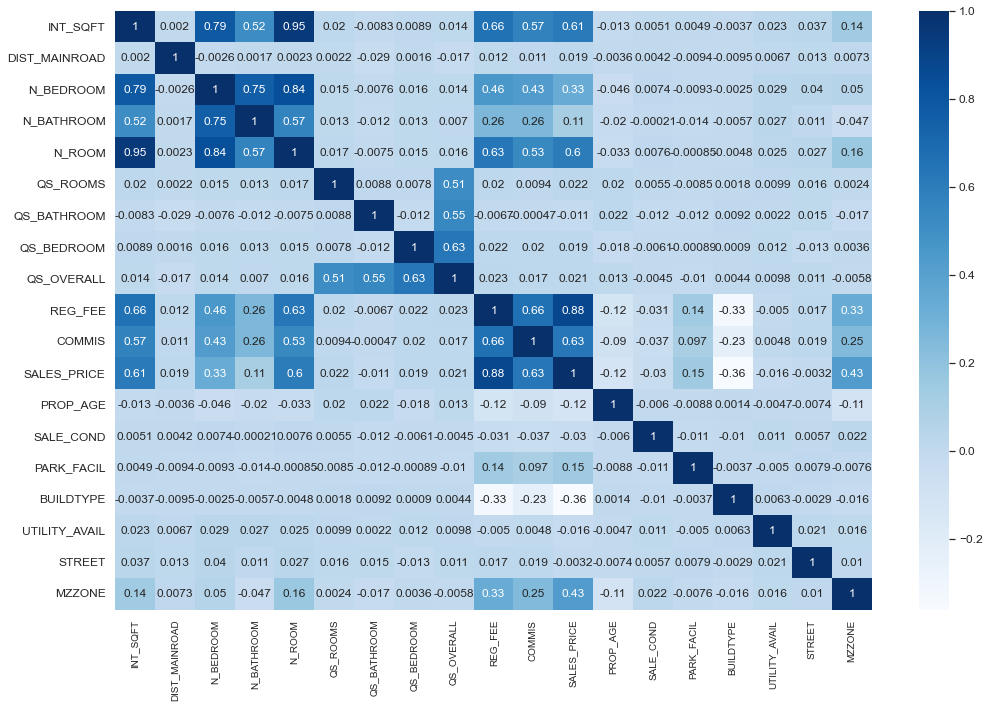

In [31]:
# Using correlation matrix
plt.figure(figsize=(15,10))
corr = main_df_ben.drop(columns=['AREA']).corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

In [32]:
# Using random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
X=main_df.drop('SALES_PRICE',axis=1)
y=main_df.SALES_PRICE
rf.fit(X, y)

feature_importances = rf.feature_importances_

indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, idx in enumerate(indices):
    print(f"{i+1}.'{X.columns[idx]}' : {feature_importances[idx]}")


Feature ranking:
1.'REG_FEE' : 0.7634755269660887
2.'AREA' : 0.06453097979873863
3.'INT_SQFT' : 0.05654894673630338
4.'BUILDTYPE' : 0.03651582812844642
5.'MZZONE' : 0.01845315754117607
6.'N_BEDROOM' : 0.015224466569206879
7.'N_BATHROOM' : 0.012273539640281182
8.'COMMIS' : 0.007195481025300933
9.'PARK_FACIL' : 0.0031703597112233617
10.'DIST_MAINROAD' : 0.0022381246018115908
11.'DATE_SALE' : 0.002216073773863872
12.'DATE_BUILD' : 0.002102093178863906
13.'PRT_ID' : 0.002101728956875694
14.'QS_OVERALL' : 0.0018944678738693431
15.'STREET' : 0.001831976991043046
16.'QS_BATHROOM' : 0.0017604346860963943
17.'QS_ROOMS' : 0.0017502475671776153
18.'N_ROOM' : 0.001744181590181143
19.'QS_BEDROOM' : 0.001632703462537372
20.'PROP_AGE' : 0.001570609390824721
21.'SALE_COND' : 0.0010364105677252038
22.'UTILITY_AVAIL' : 0.0007326612423645785


In [33]:
main_df_ben.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'REG_FEE', 'COMMIS', 'SALES_PRICE', 'PROP_AGE', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE'],
      dtype='object')

In [34]:
main_df_ben_final=main_df_ben.drop(columns=['DIST_MAINROAD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','STREET','N_ROOM','SALE_COND','PROP_AGE','UTILITY_AVAIL'])

In [35]:
main_df_ben_final.head(3)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,REG_FEE,COMMIS,SALES_PRICE,PARK_FACIL,BUILDTYPE,MZZONE
0,Karapakkam,1004,1.0,1.0,380000,144400,7600000,2,1,0
1,Anna Nagar,1986,2.0,1.0,760122,304049,21717770,0,1,3
2,Adyar,909,1.0,1.0,421094,92114,13159200,2,1,4


### One hot encoding

In [37]:
# one of the method of hot encoding is get dummy method
dummies=pd.get_dummies(main_df_ben_final.AREA)
dummies

,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery
0,False,False,False,False,True,False,False
1,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True
4,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...
7104,False,False,False,False,True,False,False
7105,False,False,False,False,False,False,True
7106,False,False,False,False,False,False,True
7107,False,False,False,False,True,False,False


In [38]:
df11=pd.concat([main_df_ben_final,dummies],axis='columns')
df11.head(3)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,REG_FEE,COMMIS,SALES_PRICE,PARK_FACIL,BUILDTYPE,MZZONE,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery
0,Karapakkam,1004,1.0,1.0,380000,144400,7600000,2,1,0,False,False,False,False,True,False,False
1,Anna Nagar,1986,2.0,1.0,760122,304049,21717770,0,1,3,False,True,False,False,False,False,False
2,Adyar,909,1.0,1.0,421094,92114,13159200,2,1,4,True,False,False,False,False,False,False


In [39]:
# Herer we are creating new column name addfees by adding regi. fee and commission.
df11['addfees']=df11['REG_FEE']+df['COMMIS']

In [40]:
df12= df11.drop(columns=['AREA','REG_FEE','COMMIS'])
df12.head(3)

,INT_SQFT,N_BEDROOM,N_BATHROOM,SALES_PRICE,PARK_FACIL,BUILDTYPE,MZZONE,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery,addfees
0,1004,1.0,1.0,7600000,2,1,0,False,False,False,False,True,False,False,524400
1,1986,2.0,1.0,21717770,0,1,3,False,True,False,False,False,False,False,1064171
2,909,1.0,1.0,13159200,2,1,4,True,False,False,False,False,False,False,513208


In [41]:
df12.columns

Index(['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'SALES_PRICE', 'PARK_FACIL',
       'BUILDTYPE', 'MZZONE', 'Adyar', 'Anna Nagar', 'Chrompet', 'KK Nagar',
       'Karapakkam', 'T Nagar', 'Velachery', 'addfees'],
      dtype='object')

In [42]:
X=df12.drop('SALES_PRICE',axis='columns') 

In [43]:
y=df12.SALES_PRICE

In [44]:
## Standardizing the price data values 
scaler = StandardScaler()
x_scaled=scaler.fit_transform(X)

In [45]:
## Splitting the Data 
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

## Creating the function to fit models 
model_preds = []

def fit_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = round(r2_score(y_test, y_pred),4)
    mse = round(mean_squared_error(y_test, y_pred),4)
    mae = round(mean_absolute_error(y_test, y_pred),4)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
    model_preds.append([model_name, r2, mse, mae, rmse])
    print ("The R-Squared Value is         : ", r2)
    print("The Mean Squared error (MSE) is : ", mse)
    print("Root Mean Squared Error (RMSE)  : ", rmse)
    print("Mean Absolute Error (MAE) is    : ", mae)

## Creating the model evaluation function 
def model_eval():
    preds = pd.DataFrame(model_preds)
    preds.columns = ["Mod_Name", "R2 Value", "MSE", "RMSE", "MAE"]
    return preds.sort_values(by="R2 Value", ascending=False)

In [55]:
## Linear Regression
print(f'\033[94mLinear Regression')
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
fit_model(lr_model, "Linear Regression")
print('*'* 50)

## Decision Trees
print(f'\033[94mDecision Trees')
dectree_model = DecisionTreeRegressor()
fit_model(dectree_model, "Decision Tree Regressor")
print('*'* 50)

## Random Forest
print(f'\033[94mRandom Forest')
randfor_model = RandomForestRegressor()
fit_model(randfor_model, "Random Forest Regressor")
print('*'* 50)

## XG Boost
print(f'\033[94mXG Boost')
XGB_model = xgb.XGBRFRegressor()
fit_model(XGB_model, "XG Boost")
print('*'* 50)

## KNN
print(f'\033[94mKNN')
knn_model = KNeighborsRegressor(n_neighbors=6)
fit_model(knn_model, "K-Neigbors Regressor")

Linear Regression
The R-Squared Value is         :  0.8899
The Mean Squared error (MSE) is :  1494480861436.0146
Root Mean Squared Error (RMSE)  :  1222489.6161
Mean Absolute Error (MAE) is    :  953335.7067
**************************************************
Decision Trees
The R-Squared Value is         :  0.9549
The Mean Squared error (MSE) is :  612354814188.6075
Root Mean Squared Error (RMSE)  :  782531.0308
Mean Absolute Error (MAE) is    :  614397.8762
**************************************************
Random Forest
The R-Squared Value is         :  0.9736
The Mean Squared error (MSE) is :  358218755020.4072
Root Mean Squared Error (RMSE)  :  598513.7885
Mean Absolute Error (MAE) is    :  481595.8218
**************************************************
XG Boost
The R-Squared Value is         :  0.9386
The Mean Squared error (MSE) is :  833208533516.3987
Root Mean Squared Error (RMSE)  :  912802.5709
Mean Absolute Error (MAE) is    :  731248.9974
*************************************

In [56]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9733075969428345

In [57]:
# shufflesplit to check model acurracy for multiple datasets.
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(regressor,X,y,cv=cv)

array([0.97382179, 0.97362181, 0.97349711, 0.97330068, 0.97546045])

In [58]:
X.head(3)

,INT_SQFT,N_BEDROOM,N_BATHROOM,PARK_FACIL,BUILDTYPE,MZZONE,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery,addfees
0,1004,1.0,1.0,2,1,0,False,False,False,False,True,False,False,524400
1,1986,2.0,1.0,0,1,3,False,True,False,False,False,False,False,1064171
2,909,1.0,1.0,2,1,4,True,False,False,False,False,False,False,513208


In [59]:
# define price predictor function ( we have used range here)
def predict_price(area,INT_SQFT,N_BEDROOM,N_BATHROOM,addfee,PARK_FACIL,BUILDTYPE,MZZONE):
    loc_index=np.where(X.columns==area)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=INT_SQFT
    x[1]=N_BEDROOM
    x[2]=N_BATHROOM
    x[3]=addfee
    x[4]=PARK_FACIL
    x[5]=BUILDTYPE
    x[6]=MZZONE
    if loc_index>=0:
        x[loc_index]=1
        predict=rf.predict([x])[0]
    return predict

In [60]:
df12.head(6)

,INT_SQFT,N_BEDROOM,N_BATHROOM,SALES_PRICE,PARK_FACIL,BUILDTYPE,MZZONE,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery,addfees
0,1004,1.0,1.0,7600000,2,1,0,False,False,False,False,True,False,False,524400
1,1986,2.0,1.0,21717770,0,1,3,False,True,False,False,False,False,False,1064171
2,909,1.0,1.0,13159200,2,1,4,True,False,False,False,False,False,False,513208
3,1855,3.0,2.0,9630290,0,4,2,False,False,False,False,False,False,True,433363
4,1226,1.0,1.0,7406250,2,4,1,False,False,False,False,True,False,False,311063
5,1220,2.0,1.0,12394750,0,1,3,False,False,True,False,False,False,False,607343


In [61]:
# def predict_price(area,INT_SQFT,N_BEDROOM,N_BATHROOM,addfee,PARK_FACIL,BUILDTYPE,MZZONE)
predict_price('Adyar',909,1,1,513208,1,0,4)

12861971.5

In [62]:
# To print dataframe with acual and predicted values
p1=predict_price('Adyar',909,1,1,607343,1,0,4)
p2=predict_price('Velachery',1614,2,1,484382,0,1,2)
p3=predict_price('Karapakkam',1226,1,1,311063,1,2,1)
p4=predict_price('Chrompet',1220,2,1,607343,0,0,3)
p5=predict_price('Anna Nagar',1986,2,1,1064171,0,0,3)
loc=['Adyar','Velachery','Karapakkam','Chrompet','Anna Nagar']

newdf=pd.DataFrame({'Locations':loc,'Actual':[12600200,13505069.15,9906250,12394750,12017770],'Predicted':[p1,p2,p3,p4,p5]})
newdf['% Difference']=((abs(newdf['Actual']-newdf['Predicted']))/newdf['Actual'])*100
newdf

,Locations,Actual,Predicted,% Difference
0,Adyar,12600200.00,12861971.50,2.077519
1,Velachery,13505069.15,13503136.25,0.014312
2,Karapakkam,9906250.00,10109822.50,2.054991
3,Chrompet,12394750.00,12370060.95,0.199190
4,Anna Nagar,12017770.00,12370060.95,2.931417
